In [27]:
#Installation des bibliothèques
#Ichou Aymane L3X 21007668
!pip install gensim
!pip install nltk
!pip install spacy

In [2]:
#Imports
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

In [4]:
import os
import requests
import zipfile


def downloadglove():
    gloveurl = "http://nlp.stanford.edu/data/glove.6B.zip"
    response = requests.get(gloveurl)
    with open("glove.6B.zip", "wb") as f:
        f.write(response.content)

def unzipglove():
    with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
        zip_ref.extractall()

if __name__ == "__main__":
    if not os.path.exists("glove.6B.100d.txt"):
        download_glove()
        unzip_glove()


In [6]:
#Conversion depuis le format GloVe au format Word2Vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-6-e21ff82c4b9f>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(32998, 100)

In [7]:
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary = False)

In [8]:
print(model.most_similar('france'))

[('belgium', 0.8076421618461609), ('french', 0.8004378080368042), ('britain', 0.7950528264045715), ('spain', 0.7557463645935059), ('paris', 0.7481585741043091), ('germany', 0.7294080257415771), ('italy', 0.7163637280464172), ('europe', 0.7097140550613403), ('netherlands', 0.7072661519050598), ('luxembourg', 0.6757033467292786)]


Les résultats obtenus sont :

('belgium', 0.8076421618461609), ('french', 0.8004378080368042), ('britain', 0.7950528264045715), ('spain', 0.7557463645935059), ('paris', 0.7481585741043091), ('germany', 0.7294080257415771), ('italy', 0.7163637280464172), ('europe', 0.7097140550613403), ('netherlands', 0.7072661519050598), ('luxembourg', 0.6757033467292786)


In [9]:
print(model.most_similar('vehicle'))

[('car', 0.8630837798118591), ('vehicles', 0.8517177700996399), ('truck', 0.7879197597503662), ('cars', 0.7703550457954407), ('suv', 0.7338638305664062), ('driving', 0.7239752411842346), ('driver', 0.707222580909729), ('jeep', 0.7060146331787109), ('trucks', 0.6973459124565125), ('parked', 0.6889974474906921)]


Les mots les plus similaires sont : [('car', 0.8630837798118591), ('vehicles', 0.8517177700996399), ('truck', 0.7879197597503662), ('cars', 0.7703550457954407), ('driving', 0.7239752411842346), ('driver', 0.707222580909729), ('trucks', 0.6973459124565125), ('parked', 0.6889974474906921), ('bus', 0.6676686406135559), ('passenger', 0.6662374138832092)]

In [10]:
# Test de la fonction avec une phrase donnée
analogie = "Paris is to france, like Rome is to ?"
#Renvoie le 1er mot le plus probable
missing_word = model.most_similar(positive=['rome', 'france'], negative=['paris'], topn=1)
print("The missing word is :", missing_word)

The missing word is : [('italy', 0.8295994400978088)]


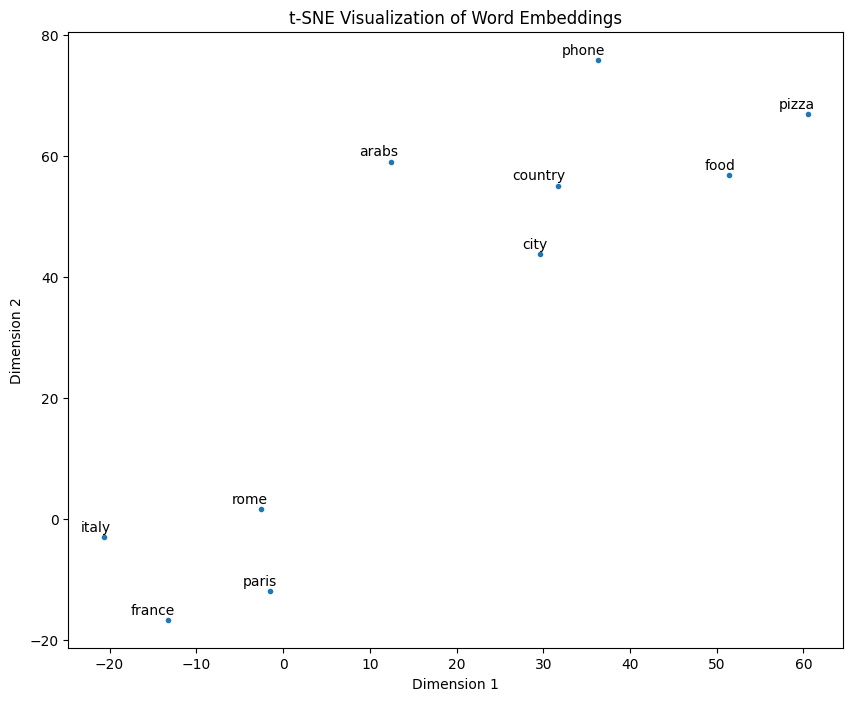

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = ['paris', 'france', 'rome', 'country', 'food', 'pizza', 'italy', 'city', 'arabs', 'phone']
words_subset = np.random.choice(words, size= len(words), replace=False)

# Conversion en un tableau NumPy
vectors = np.array([model[word] for word in words_subset])

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity = 2)
vectors_2d = tsne.fit_transform(vectors)

# Visualisation
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.')
for i, word in enumerate(words_subset):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

J'observe l'apparition de cluster par exemple : [rome, paris, italy, france ] qui regrouperait l'idée d'un lieu, [Food, pizza, ~ country] qui regrouperait l'idée de nourriture, etc...

In [21]:
# Import des bibliothèques
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Chargement des données
data = pd.read_csv('corpus.csv', encoding='latin1')

# Prétraitement des données
data['text'] = data['text'].apply(lambda x: x.lower())

# Division des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Représentation des textes avec des vecteurs de mots
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Entraînement du modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectors, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test_vectors)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy)




Précision du modèle : 0.8615


In [26]:
#Fonction d'interprétation de résultat : label2 = positif , label1 = negatif

def translate(str):
  print(str)
  if str ==  "__label__2 ":
    return "positif"
  if str ==  "__label__1 " :
    return "negatif"
  else:
    return "je sais pas"

# Prétraitement de la phrase exemple
phrase_exemple = "It's a beautiful day ! "
phrase_exemple_preprocessed = phrase_exemple.lower()
phrase_exemple_vector = vectorizer.transform([phrase_exemple_preprocessed])
categorie_predite = model.predict(phrase_exemple_vector)
print("Catégorie prédite pour la phrase exemple :", translate(categorie_predite[0]))

phrase_exemple2 = "It's a very bad day ! "
phrase_exemple_preprocessed2 = phrase_exemple2.lower()
phrase_exemple_vector2 = vectorizer.transform([phrase_exemple_preprocessed2])
categorie_predite2 = model.predict(phrase_exemple_vector2)
print("Catégorie prédite pour la phrase exemple :", translate(categorie_predite2[0]))

__label__2 
Catégorie prédite pour la phrase exemple : positif
__label__1 
Catégorie prédite pour la phrase exemple : negatif
